In [1]:
import matplotlib.pyplot as plt

from plotters import *

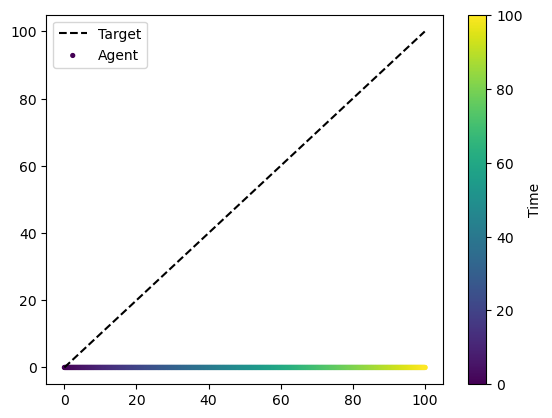

In [3]:
plot_agent_results('/Users/adamboesky/Research/RL_CMAES/trajectories/straight.csv', '/Users/adamboesky/Research/RL_CMAES/sim_results/test.csv')
plt.show()